In [5]:
import numpy as np
import matplotlib.pyplot as plt

6
b - a = 0.30769230769230765


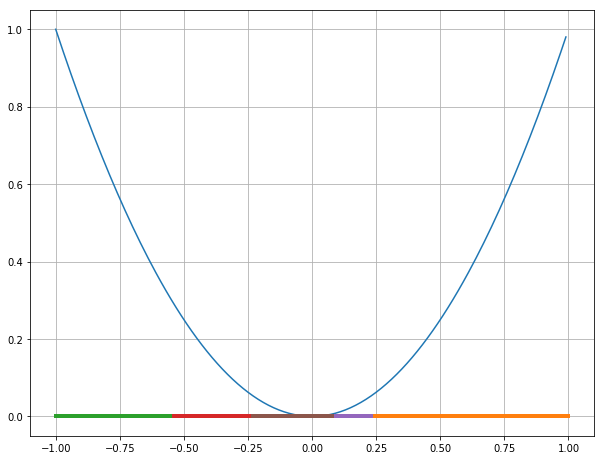

In [57]:
fig = plt.figure(figsize=(8.5, 6.5))

ax = fig.add_subplot(111)
#ax.set_title(r'Timing depending on processes amount (N=$10^7$)')
#ax.set_xlabel('MPI Processes, amount')
#ax.set_ylabel('Timing, ms')

#golden
g = (1 + 5 ** 0.5) / 2

input = "1 0 0 -1 1 1e-1"
c1, c2, c3, a, b, e = [float(x) for x in input.split()]

def F(N):
    return (g**(N+1)-(-1/g)**(N+1))/5**0.5

def f(x):
    return c1*x**2 + c2*x + c3

def y_new(a, b, n):
    return a + F(k-n-1)/F(k-n+1)*(b-a)

def z_new(a, b, n):
    return a + F(k-n)/F(k-n+1)*(b-a)


xs = np.arange(a, b, 1e-2) 
ax.plot(xs, f(xs))

fs = []
borders = []

import math
k = math.ceil(math.log(5**0.5*(b-a)/(2*e))/math.log(g)) - 1
y = y_new(a, b, 1)
z = z_new(a, b, 1)

fy, fz = f(y), f(z)
fs.append(fy)
borders.append([a, b])
for i in range(2, k):
    if fy <= fz:
        b = z
        z = y 
        y = y_new(a, b, i)
        fz = fy 
        fy = f(y)
        fs.append(fy)
    else:
        a = y
        y = z
        z = z_new(a, b, i)
        fy = fz
        fz = f(z)
        fs.append(fz)
    borders.append([a, b])

print(k)
#print(fs)

#print(k*sum(fs[-5:]))

for i in range(len(borders)):
    ax.plot(borders[i], [0, 0], linewidth=4.0)

print(f"b - a = {b-a}")    

plt.tight_layout()
plt.grid()
plt.show()

Function calls: 18
Error achieved: 0.004669488809999844


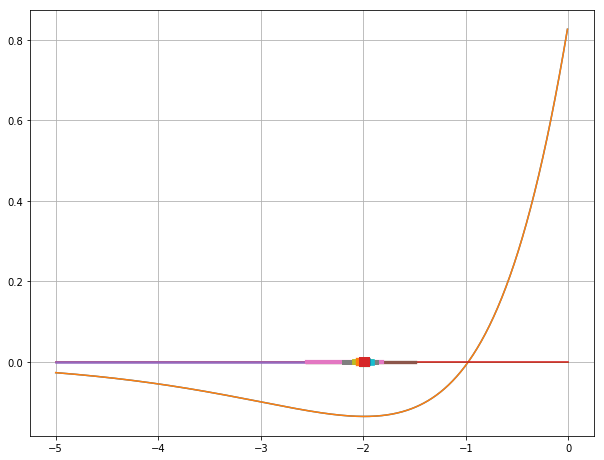

In [64]:
a, b = -5, 0
t = 0.7
eps = 1e-2

def f(x):
    return x*np.exp(x) + np.sin(np.exp(x))

fig = plt.figure(figsize=(8.5, 6.5))

ax = fig.add_subplot(111)

xs = np.arange(a, b, 1e-2) 
ax.plot(xs, f(xs))

def split(a, b, t):
    return a + t*(b-a)

xs = np.arange(a, b, 1e-2) 
ax.plot(xs, f(xs))

fs = []
borders = []

import math
x = split(a, b, t)
fx = f(x)
# Amount of function calls
k = 1

borders.append([a, b])
while b - a > eps:
    fs.append(fx)
    borders.append([a, b])
    y = split(a, x, t)
    fy = f(y)
    k += 1
    if fy <= fx:
        b = x
        x = y
        fx = fy
    else:
        z = split(x, b, t)
        fz = f(z)
        k += 1
        if fz <= fx:
            a = x
            x = z
            fx = fz
        else:
            a = y
            b = z
print(f"Function calls: {k}")
print(f"Error achieved: {b-a}")

for i in range(len(borders)):
    ax.plot(borders[i], [0, 0], linewidth=10.0 * (i+1) / len(borders))

plt.tight_layout()
plt.grid()
plt.show()

Покажем, что:
$$\forall C, q \ \ \exists k \ \ \frac{1}{k} > Cq^k $$
$$\forall C, q \ \ \exists k \ \ -\ln k > \ln C + k \ln q$$

Эквивалентно показать, что:
$$\forall \alpha > 0, \beta \; \; \exists x \;\; f(x) = \alpha x + \beta - \ln x > 0$$

Посмотрим на производную:
$$f'(x) = \alpha - \frac{1}{k}$$

По т.Лагранжа о приращениях:
$$f(x) - f(x_0) = f'(\xi) (x - x_0), \;\; \xi \in (x_0, x)$$
Рассмотрим $x_0$ достаточно большое, чтобы $\alpha - \frac{1}{x_0} = M > 0$, тогда:
$$f(x) - f(x_0) \ge M (x - x_0)$$
$$f(x) \ge f(x_0) + M (x - x_0)$$
Возвращаемся к неравенству:
$$f(x) \ge f(x_0) + M (x - x_0) > 0$$
$$x > x_0 - \frac{f(x_0)}{M}$$

Ясно, что такой $x$, следовательно, и $k$ существует.

Есть подозрение, что для сверхлинейной такое определение не работает:
$$\| x_{k+1} - x^* \|_2 \leq Cq^{k^2}$$

Действительно, покажем, что $\{\frac{1}{k^k}\}$ не является сверхлинейной по этому определению:
$$\frac{1}{k^k} > C q^{(k-1)^2}$$
$$-k \ln k > \ln C + (k-1)^2 \ln q$$

Заменим: $\ln C = \beta$. $-\ln q = \alpha > 0$.
$$\alpha (k-1)^2 -k \ln k -\beta > 0$$
$$k(\alpha k  - \ln k - 2\alpha) - \beta + \alpha> 0$$

С какого-то момента будет выполнено: $\alpha k - \ln k - 2\alpha > 1$, тогда:
$$k - \beta + \alpha > 0$$
Тоже будет выполнено с какого-то момента. Так что неравенство не удовлетворяется.

Теперь покажем, что последовательность сходится \textit{сверхлинейно} по другому определению ($x^* = 0$):
$$\| x_{k+1} - x^* \|_2 \leq C_k\| x_k - x^* \|_2
$$
где $q \in (0, 1)$ и $ 0 < C_k < \infty$, $C_k \to 0$

$$\frac{1}{(k+1)^{k+1}} \le \frac{1}{k^{k+1}} = \frac{1}{k}\cdot \frac{1}{k^k} \le C_k \frac{1}{k^k}$$

Возьмём $C_k = \frac{1}{k}$, так что $C_k \to 0$.
